# importing lib.


In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline 
#to draw graph in notebook

print("importing success")


importing success


In [2]:
# since Pokemon has some different character, to decode this ...used encoding ='latin1'

In [3]:
df = pd.read_csv("/home/prabhat/Data_File/Pokemon.csv", index_col=0,encoding="latin1")

In [4]:
df.index.name = "Index" 
# index.name is used for setting index col. name
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
Index,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [5]:
df.shape

(151, 12)

In [6]:
df.columns

Index(['Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Stage', 'Legendary'],
      dtype='object')

# ScatterPlot

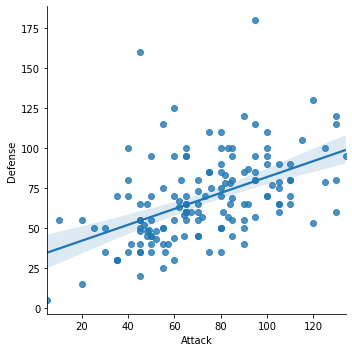

In [7]:
sns.lmplot(x='Attack', y='Defense', data = df)

In [8]:
# fit_reg=False to remove the regression line
# hue ='Stage' to color our points

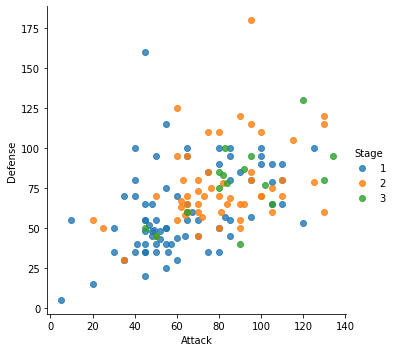

In [9]:
sns.lmplot(x='Attack', y='Defense', data=df, fit_reg=False, hue='Stage')

In [10]:
#ylim() and xlim()  is used to set the limit 

(0.0, 200.0)

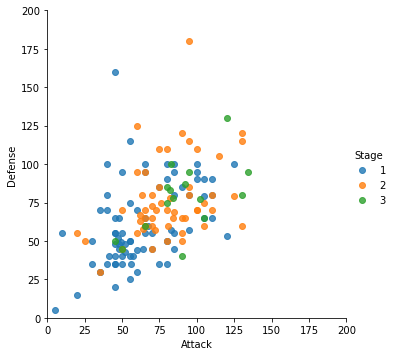

In [11]:
sns.lmplot(x='Attack', y='Defense', data=df, hue='Stage', fit_reg=False)

plt.ylim(0, 200)
plt.xlim(0, 200)

# Box Plot

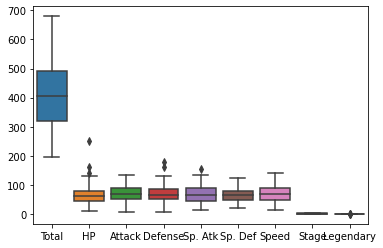

In [12]:
sns.boxplot(data=df)

In [13]:
rm_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)

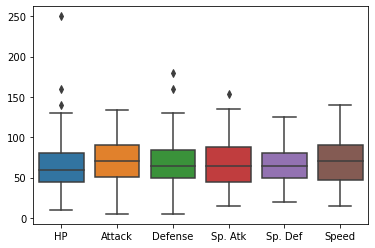

In [14]:
sns.boxplot(data=rm_df)

# violin plot

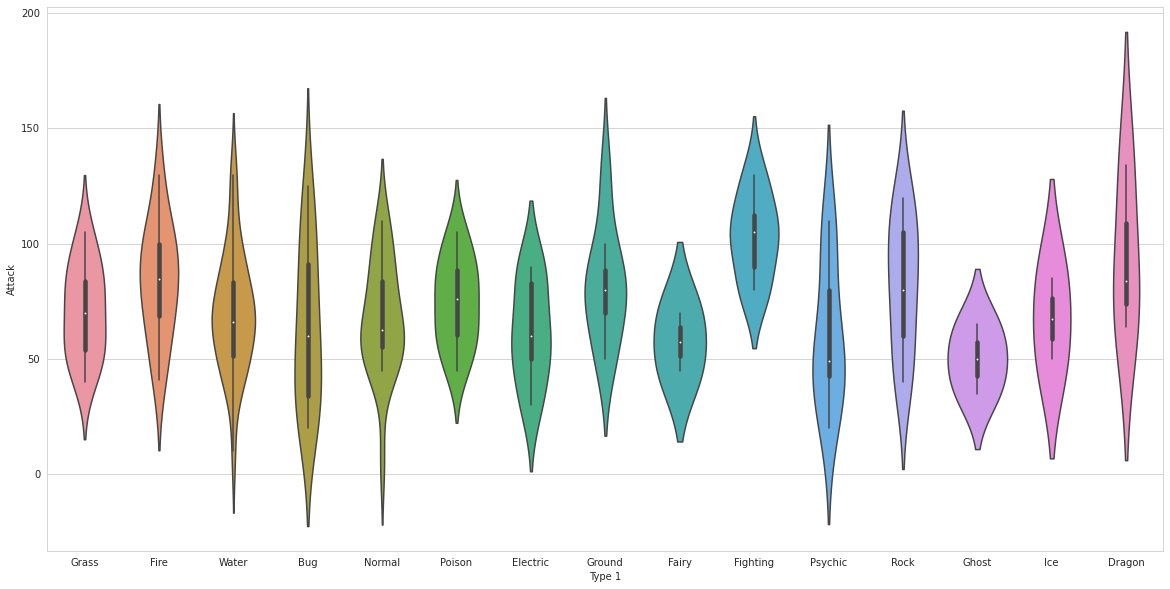

In [15]:
sns.set_style('whitegrid')
# adjust figure size
plt.figure(figsize=(20,10))
sns.violinplot(x='Type 1', y='Attack', data=df)

# setting color palette

In [20]:
pkmn_type_colors = ['#78C850',   #GRASS
                    '#F08030',   #FIRE
                    '#6890F0',   #WATER
                    '#A8B820',  #BUG
                    '#A8A878',   #NORMAL
                    '#A040A0',   #POISON
                    '#F8D030',   #ELECTRIC
                    '#E0C068',   #GROUND
                    '#EE99AC',   #FAIRY
                    '#C03028',   #FIGHTING
                    '#F85888',   #PSYCHIC
                    '#B8A038',   #ROCK
                    '#705898',   #GHOST
                    '#98D8D8',   #ICE
                    '#7038F8',  # DRAGON
                   ] 

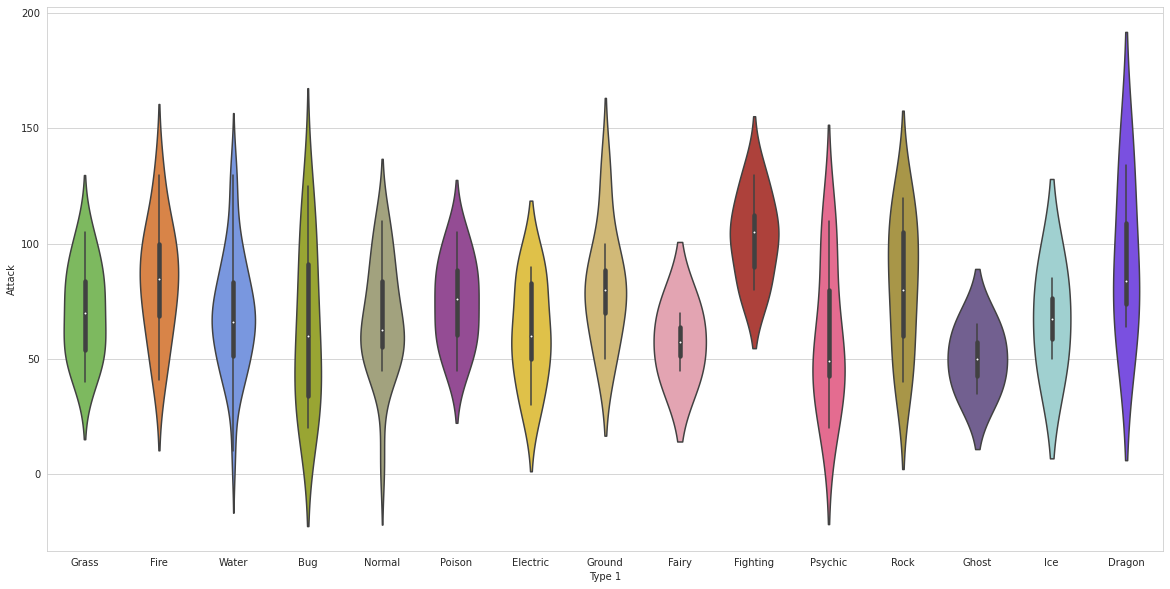

In [21]:
# violin plot with color palette
plt.figure(figsize=(20,10))

sns.violinplot(x='Type 1', y='Attack', data=df, palette=pkmn_type_colors)

# swarm plot

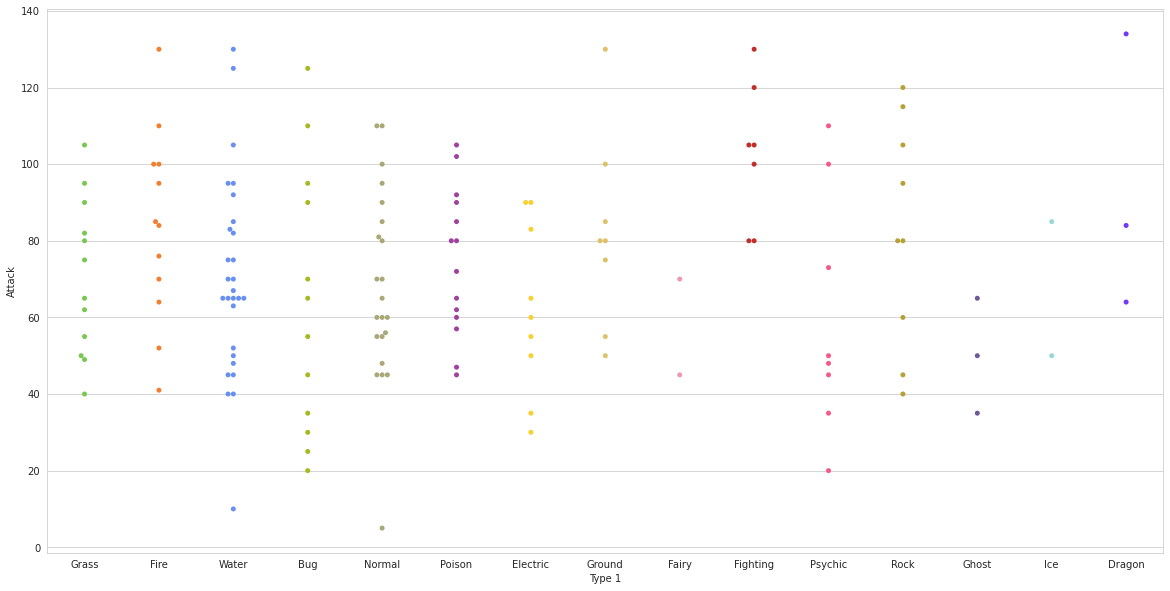

In [23]:
plt.figure(figsize=(20,10))
sns.swarmplot(x='Type 1', y='Attack', data=df, palette=pkmn_type_colors)

# overlaying plots

Text(0.5, 1.0, 'Attack by Type')

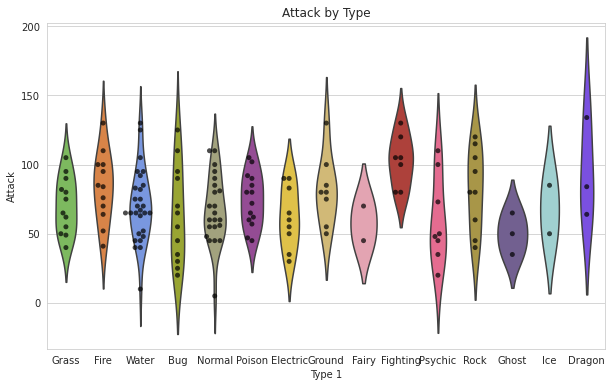

In [26]:
plt.figure(figsize=(10,6))

sns.violinplot(x='Type 1', y='Attack', data=df, inner=None, palette=pkmn_type_colors)

sns.swarmplot(x='Type 1', y='Attack', data=df, color='k', alpha=0.7)
# color used for make point black
# alpha is for transparent

plt.title('Attack by Type')

In [27]:
rm_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Index,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80


# melt 

In [29]:
m_df = pd.melt(rm_df, 
              id_vars=["Name", "Type 1", "Type 2"],
              var_name="Stat")

m_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


In [30]:
m_df.shape

(906, 5)

In [36]:
# melt is used for combine two or more column into single column

In [39]:
print("original data set", df.shape)
print("melted df shape", m_df.shape)
#it become 6 times 

original data set (151, 12)
melted df shape (906, 5)


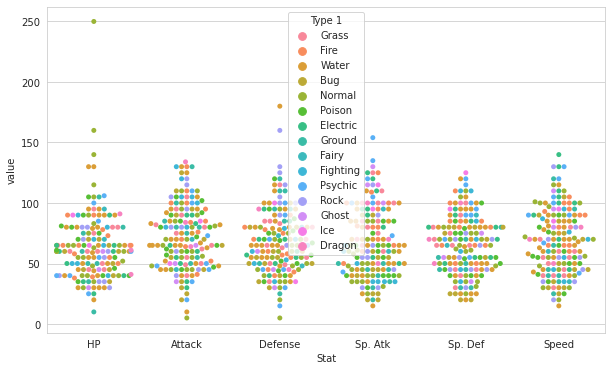

In [41]:
plt.figure(figsize=(10,6))
sns.swarmplot(x='Stat', y='value', data=m_df, hue='Type 1')

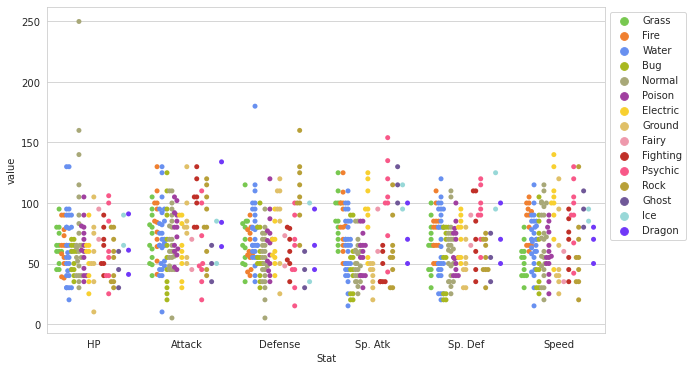

In [43]:
plt.figure(figsize=(10,6))

sns.swarmplot(x='Stat',
              y='value',
             data=m_df,
              hue="Type 1",
              dodge=True, # separate points by hue
              palette=pkmn_type_colors)

plt.legend(bbox_to_anchor=(1,1), loc=2)

# heatmap

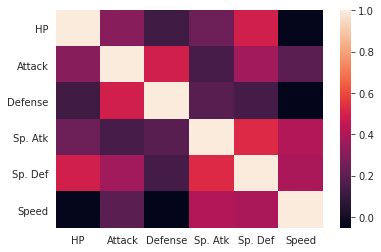

In [46]:
corr = rm_df.corr()

sns.heatmap(corr)

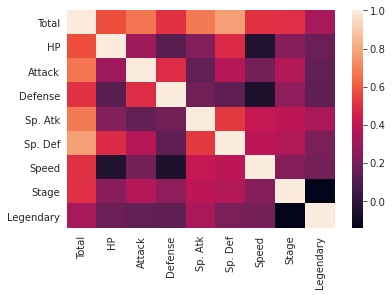

In [47]:
df.corr()

sns.heatmap(df.corr())

# histogram

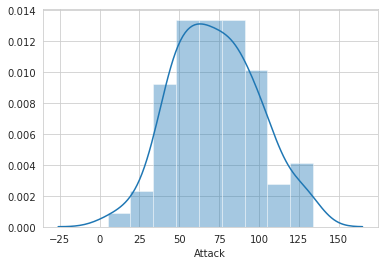

In [48]:
sns.distplot(df.Attack)

# Barplot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

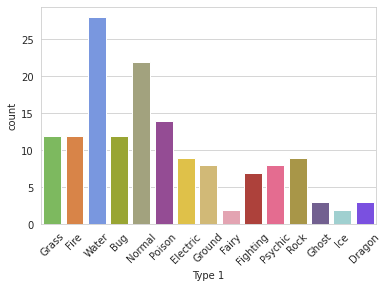

In [49]:
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)

plt.xticks(rotation=45) 
# rotate x-labels

# Factor plot

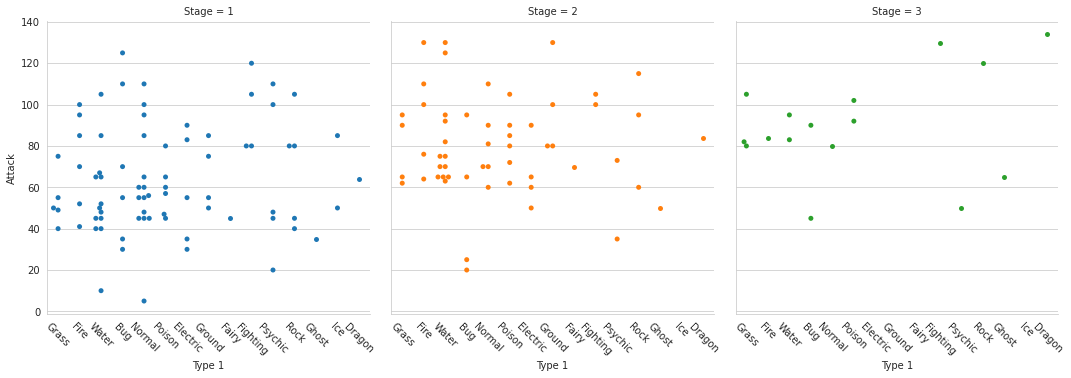

In [51]:
g = sns.catplot(x='Type 1',
                   y='Attack',
                   data=df,
                   hue='Stage',
                   col='Stage',
                    kind='swarm')
g.set_xticklabels(rotation=-45)

# density plot

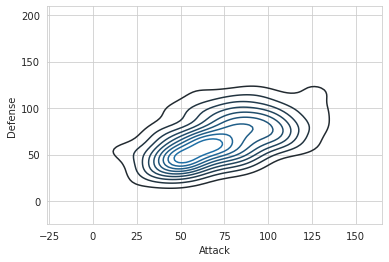

In [52]:
sns.kdeplot(df.Attack, df.Defense)

(0.0, 164.97710302357532)

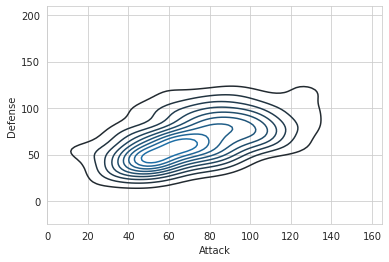

In [53]:
sns.kdeplot(df.Attack, df.Defense)

plt.xlim(0, None)

# joint distribution plot

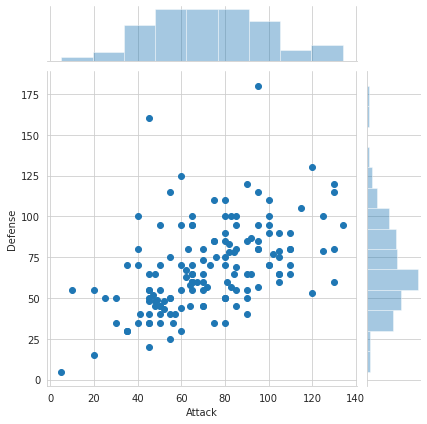

In [54]:
sns.jointplot(x='Attack', y= 'Defense', data=df)